## DVA256 - Data Management and Datafication

### Exercise 1

The exercise 1 covers the topics of image data processing. It also evaluates the students' understanding of the methods to convert images into valuable information that can be used with advanced data analytics techniques.


#### Exercise Narration

4 different stereo image pair sets are provided, one for each different illumination condition: Fluorescent (Image 1), Daylight (Image 2), Flashlight (Image 3) and Lamps (Image 4) are presented below. Each illumination condition with exception of fluorescent has specific issues that create difficulties for developing algorithms for image processing research and applications.

![Stereo image pair sets at 4 different illumination condition](dva256_exercise1.png)

Perform the following tasks by filling the cells below with appropriate python code. Please note that use of library modules are acceptable.

### Solution

Necessary Modules

In [4]:
# necessary models are loaded below to perform the given tasks.

import os

import numpy as np
import pandas as pd

import cv2 as cv
from skimage.io import imread, imshow
from skimage import color, img_as_ubyte
from skimage import feature, filters
from skimage.exposure import histogram, cumulative_distribution

from PIL import Image
from IPython.display import display

from scipy.stats import cauchy, logistic

import matplotlib.pyplot as plt
%matplotlib inline

Loading Images 

In [5]:
# path to the directory/folder containing the image files.
IMAGE_DIRECTORY = "images/" 

# list of paths to image files and their identifiers
IMAGE_PATHS = pd.DataFrame(columns = ['name', 'path'])

# reading all files in the directory and saving the paths of the files only.
for entry in os.listdir(IMAGE_DIRECTORY):
    path = os.path.join(IMAGE_DIRECTORY, entry)
    if os.path.isfile(path):
        IMAGE_PATHS.loc[len(IMAGE_PATHS)] = [entry.split('.')[0], path]

# sorting the images based on their names.
IMAGE_PATHS = IMAGE_PATHS.sort_values(by = 'name').reset_index(drop = True) 

# printing the summary of the image dataset.
num_of_images = len(IMAGE_PATHS)
print('{} image(s) are found in the directory.'.format(num_of_images))
IMAGE_PATHS

8 image(s) are found in the directory.


name                 path
0  Image_1a  images/Image_1a.png
1  Image_1b  images/Image_1b.png
2  Image_2a  images/Image_2a.bmp
3  Image_2b  images/Image_2b.bmp
4  Image_3a  images/Image_3a.gif
5  Image_3b  images/Image_3b.gif
6  Image_4a  images/Image_4a.tif
7  Image_4b  images/Image_4b.tif

#### Task 1: Basic Image Processing Tasks

(a) Displaying the images.

In [6]:
def show_image(image_path):
    ###
    #   description:  
    #       this function generates a plot with the image stored at the given path and shows in the notebook .
    #  
    #   input parameters: 
    #       image_path (string): path to the image to be displayed.
    #
    ### 
    img = imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    ###
    #  INSERT YOUR CODE to read the image and show in notebook.
    ###

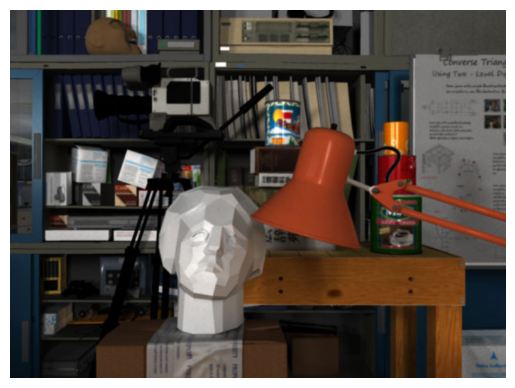

In [7]:
# displaying the first image from the dataset.
image_path = IMAGE_PATHS.loc[0]['path']
show_image(image_path)

(b) Exploring the type of the images.

In [165]:
def get_image_type(image_path):
    ###
    #   description:  
    #       this function returns the type of the image stored at the given path.
    #  
    #   input parameters: 
    #       image_path (string): path to the image to be displayed.
    #   
    #   output: 
    #       image_type (string): type of the image stored at the given path.
    ### 
    file_extension = image_path.split('.')[1]
    image_type = file_extension.upper()
    ###
    #  INSERT YOUR CODE to read the image and the image type.
    ###
    return image_type

In [166]:
# exploring the type of an images.
image_path = IMAGE_PATHS.loc[0]['path']
image_type = get_image_type(image_path)
print(image_type)

PNG


(c) Exploring the resolution of the images.

In [169]:
def get_image_resolution(image_path):
    ###
    #   description:  
    #       this function returns the resolution of the image stored at the given path.
    #  
    #   input parameters: 
    #       image_path (string): path to the image to be displayed.
    #   
    #   output: 
    #       image_resolution (tuple): resolution (height, width, channel) of the image stored at the given path.
    ### 
    with Image.open(image_path) as img:
        width, height = img.size
    channel = len(img.getbands())
    image_resolution = height, width, channel
    ###
    #  INSERT YOUR CODE to read the image and the image resolution.   
    ###
    return image_resolution

In [170]:
# exploring the resolution of an images.
image_path = IMAGE_PATHS.loc[0]['path']
image_resolution = get_image_resolution(image_path)
print(image_resolution)

(586, 789, 4)


#### Task 2: Image Transformation

(a) Transforming image formats and saving in directory.

In [171]:
def convert_to_rgb_and_save(image_path, image_name):
    ###
    #   description:  
    #       this function converts the given image into RGB image and stores in the directory.
    #  
    #   input parameters: 
    #       image_path (string): path to the image to be converted into RGB image.
    #       image_name (string): name of the image to be converted into RGB image.
    #   
    #   output: 
    #       converted_image_path (string): path to the converted image.
    ### 
    ##convert image to rgb
    with Image.open(image_path) as img:
        img = img.convert('RGB')
        
    converted_image_path = image_name + '_converted.jpg'
    img.save(converted_image_path)
    ###
    #  INSERT YOUR CODE to read the image and convert into RGB image.
    ###
    return converted_image_path

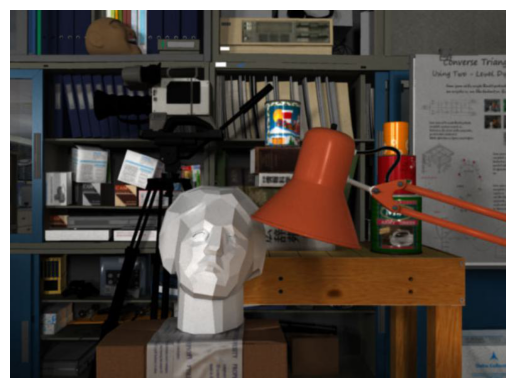

In [172]:
# transforming the image formats into RGB/JPG and saving in directory.
image_path = IMAGE_PATHS.loc[0]['path']
image_name = IMAGE_PATHS.loc[0]['name']
converted_image_path = convert_to_rgb_and_save(image_path, image_name)
show_image(converted_image_path)

(b) Resizing images.

In [173]:
def resize_and_save(image_path, image_name, output_resolution):
    ###
    #   description:  
    #       this function resizes the given image into RGB image and stores in the directory.
    #  
    #   input parameters: 
    #       image_path (string): path to the RGB image to be resized as given.
    #       image_name (string): name of the image to be resized.
    #       output_resolution (tuple): expected resolution (height, width) of the converted image.
    #   
    #   output: 
    #       resized_image_path (string): path to the converted image.
    ### 
    img = Image.open(image_path)
    img = img.resize(output_resolution)
    resized_image_path = image_name + '_resized.jpg'
    img.save(resized_image_path)
    ###
    #  INSERT YOUR CODE to read the image and resize.
    ###
    return resized_image_path

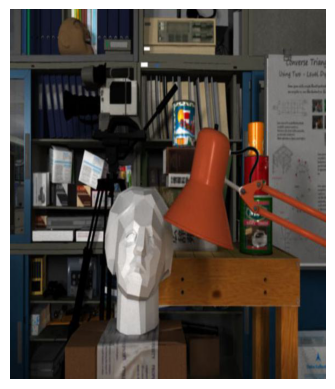

In [174]:
# resizing the converted image from previous step into 540 x 680 and saving in the directory.
resized_image_path = resize_and_save(converted_image_path, image_name, (580, 680))
show_image(resized_image_path)

(c) Transforming into gray scale image.

In [175]:
def convert_to_grayscale_and_save(image_path, image_name):
    ###
    #   description:  
    #       this function converts the given image into RGB image and stores in the directory.
    #  
    #   input parameters: 
    #       image_path (string): path to the RGB image to be converted into grayscale image.
    #       image_name (string): name of the image to be converted into grayscale image.
    #   
    #   output: 
    #       grayscale_image_path (string): path to the converted grayscale image.
    ### 
    
    ##img = Image.open(image_path)
    ##img = img.convert('L')
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    srgb = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)
    grayscale_image_path = image_name + '_grayscale.jpg'
    cv.imwrite(grayscale_image_path, srgb)
    ##img = img.save(grayscale_image_path)
    ###
    #  INSERT YOUR CODEto read the image and convert into grayscale image.
    ###
    return grayscale_image_path

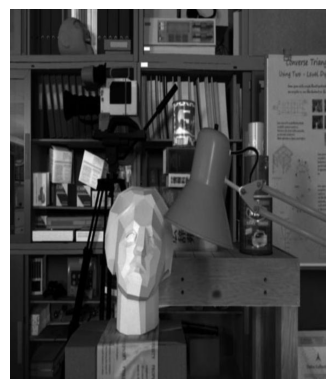

In [176]:
# converting the resized image from previous step into grayscale and saving in the directory.
grayscale_image_path = convert_to_grayscale_and_save(resized_image_path, image_name)
show_image(grayscale_image_path)

#### Task 3: Image Enhancement using Histogram manipulation

(a) Using linear function.

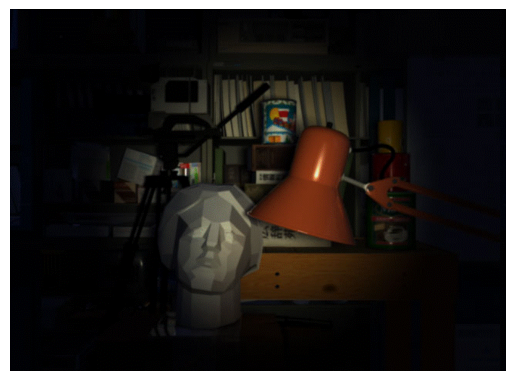

In [177]:
# selecting and loading an image from the given dataset, which will be enhanced.
image_path = IMAGE_PATHS.loc[4]['path']
image_name = IMAGE_PATHS.loc[4]['name']
show_image(image_path)

image = imread(image_path)

In [178]:
def enhance_channel_linear(channel):
    ###
    #   description:  
    #       this function enhances the specific channel of the input color image using linear function.
    #  
    #   input parameters:  
    #       channel (numpy array): specific channel of the input image of low quality. 
    #   
    #   output: 
    #       enhanced_channel (numpy array): a numpy array containing the enhanced channel of the image.
    ### 
    
    hist, bins = np.histogram(channel.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    alpha = 2
    beta = 100
    enhanced_channel = cv.convertScaleAbs(channel, alpha=alpha, beta=beta)
    
    ###
    #  INSERT YOUR CODE to enhance the specific channel.
    ###
    return enhanced_channel

In [179]:
def enhance_image_linear(image):
    ###
    #   description:  
    #       this function enhances the the input color image using linear function.
    #
    #   input parameters: 
    #       image (numpy array): a numpy array containing the image of low quality.
    #   
    #   output: 
    #       enhanced_image (numpy array): a numpy array containing the enhanced image.
    ### 
    #32bit float datatype
    image = image.astype(np.float32)
    
    ## slicing on numpy array to split the color/channels from image (0 is reds, 1 greens, 2 blues)
    r = image[:, :, 2]
    g = image[:, :, 1]
    b = image[:, :, 0]
    
    b = enhance_channel_linear(b)
    g = enhance_channel_linear(g)
    r = enhance_channel_linear(r)
    
    enhanced_image = cv.merge((b, g, r))
    #makes sure all values above 255 are set to 255 all values below 0 set to 0.
    enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)
    ###
    #  INSERT YOUR CODE to enhance the input image by utilising 'enhance_channel_linear' method for all the channels.
    ###
    return enhanced_image

Text(0.5, 1.0, 'Enhanced Image (linear)')

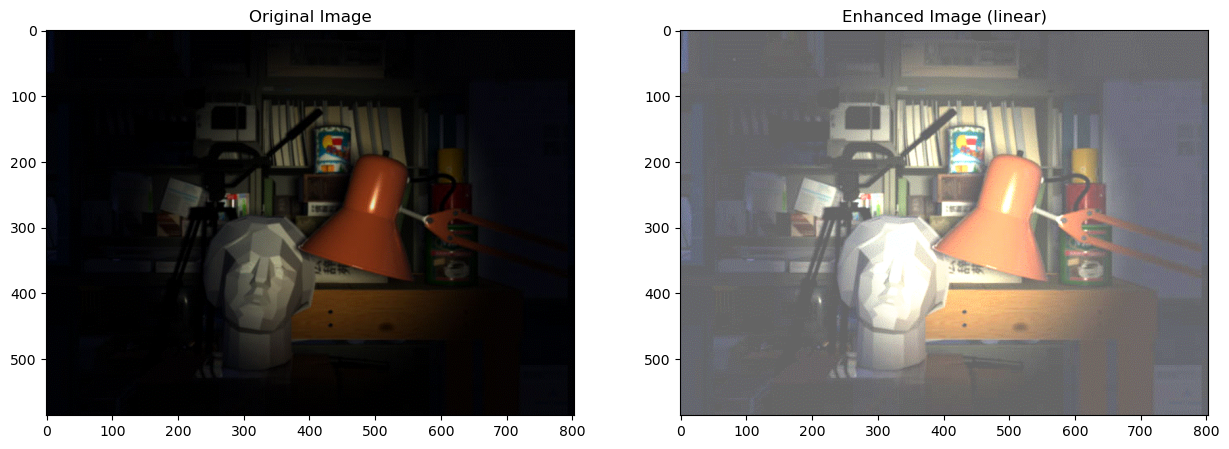

In [180]:
# enhancing the selected image using histogram manipulation technique with linear function and comparing.
enhanced_image = enhance_image_linear(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(enhanced_image)
axs[1].set_title('Enhanced Image (linear)')

(b) Using buit-in functions.

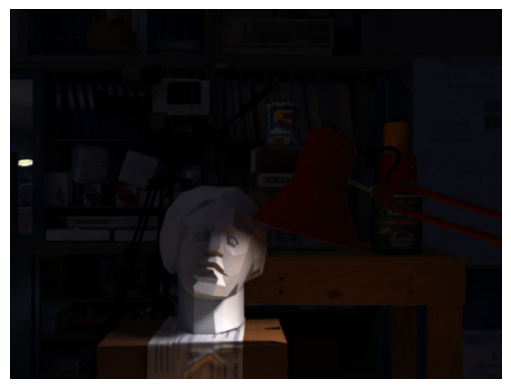

In [181]:
# selecting and loading an image from the given dataset, which will be enhanced.
image_path = IMAGE_PATHS.loc[6]['path']
image_name = IMAGE_PATHS.loc[6]['name']
show_image(image_path)

image = imread(image_path)

In [182]:
def enhance_channel_builtin(channel, function, mean, std):
    ###
    #   description:  
    #       this function enhances the specific channel of the input color image using the specified method.
    #  
    #   input parameters:
    #       channel (int): specific channel of the input image of low quality.
    #       function (scipy.stat method): the builtin method to be used for histogram manipulation.
    #       mean (int): average intensity of the pixels to achieved.
    #       std (int): standard deviation of the intensity of the pixels to be achieved. 
    #   
    #   output: 
    #       enhanced_channel (numpy array): a numpy array containing the enhanced channel of the image.
    ### 
    dist = function(mean, std)
    img_byte = img_as_ubyte(channel)
    freq, bins = cumulative_distribution(img_byte)
    enhanced_channel = np.interp(freq, dist.cdf(np.arange(0,256)), np.arange(0,256))
    enhanced_channel = enhanced_channel[img_byte].astype(np.uint8)
    return enhanced_channel
    ###
    #  INSERT YOUR CODE to enhance the specific channel using the distribution from the specified method.
    ###

In [183]:
def enhance_image_buitlin(image, function, mean, std):
    ###
    #   description:  
    #       this function enhances the the input color image using the specified builtin function.
    #  
    #   input parameters: 
    #       image (numpy array): a numpy array containing the image of low quality.
    #       function (scipy.stat method): the builtin method to be used for histogram manipulation.
    #       mean (int): average intensity of the pixels to achieved.
    #       std (int): standard deviation of the intensity of the pixels to be achieved. 
    #   
    #   output: 
    #       enhanced_image (numpy array): a numpy array containing the enhanced image.
    ### 
    r = image[:, :, 2]
    g = image[:, :, 1]
    b = image[:, :, 0]
    
    r = enhance_channel_builtin(r, function, mean, std)
    g = enhance_channel_builtin(g, function, mean, std)
    b = enhance_channel_builtin(b, function, mean, std)
    
    enhanced_image = cv.merge((b, g, r))
    #enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)
    ###
    #  INSERT YOUR CODE to enhance the input image by utilising 'enhance_channel_builtin' method for all the channels with specified method.
    ###
    return enhanced_image

Text(0.5, 1.0, 'Enhanced Image (cauchy)')

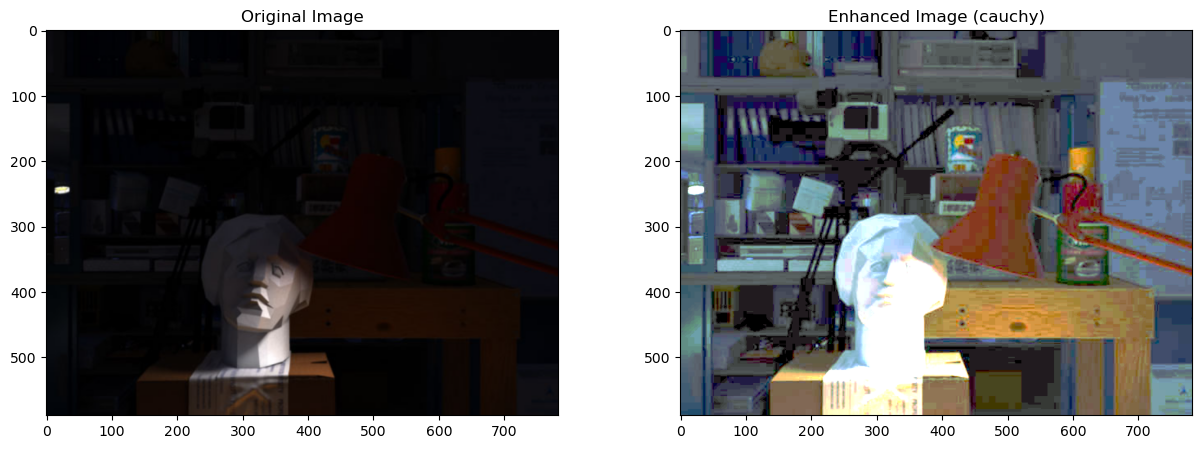

In [184]:
# enhancing the selected image using histogram manipulation technique with builtin function 'cauchy' (mean = 90, std = 30) and comparing.
enhanced_image = enhance_image_buitlin(image, cauchy, 90, 30)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(enhanced_image)
axs[1].set_title('Enhanced Image (cauchy)')

Text(0.5, 1.0, 'Enhanced Image (logistic)')

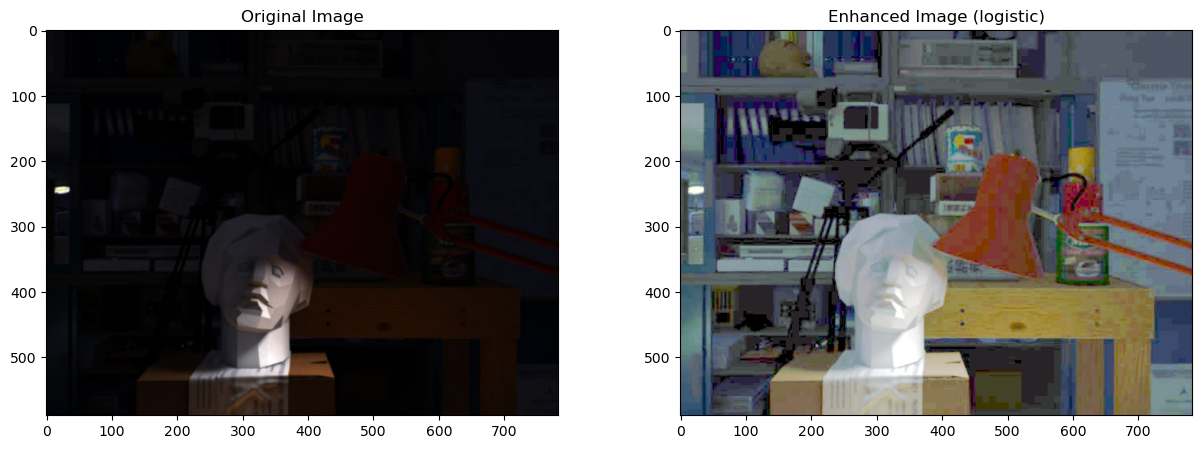

In [185]:
# enhancing the selected image using histogram manipulation technique with builtin function 'logistic' (mean = 90, std = 30) and comparing.
enhanced_image = enhance_image_buitlin(image, logistic, 90, 30)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(enhanced_image)
axs[1].set_title('Enhanced Image (logistic)')

#### Task 4: Feature Extraction

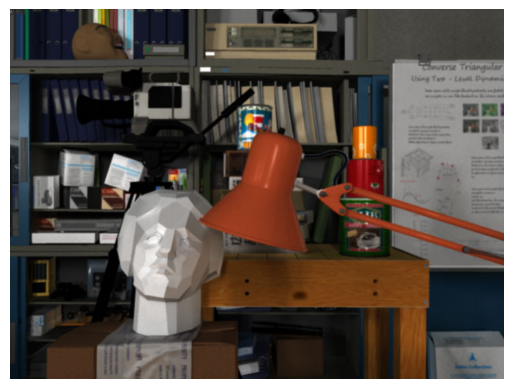

In [186]:
# selecting an image from the given dataset, which will be used to compute different image features.
image_path = IMAGE_PATHS.loc[1]['path']
image_name = IMAGE_PATHS.loc[1]['name']
show_image(image_path)

(a) Extraction of Corner features.

In [187]:
def compute_harris_corners(image):
    ###
    #   description:  
    #       this function computes the harris corner features from the given image.
    #  
    #   input parameters: 
    #       image (numpy array): a numpy array containing the image of which the corner features are to be computed.
    #   
    #   output: 
    #       corner_harris (numpy array): harris corner features from the given image.
    ### 
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    corner_harris = feature.corner_harris(gray)
    ###
    #  INSERT YOUR CODE to compute the corner features.
    ###
    return corner_harris

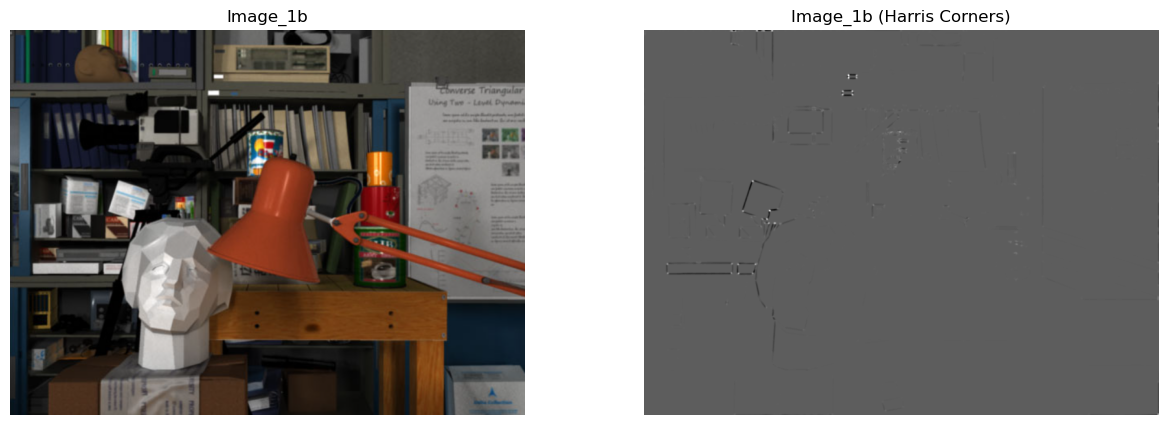

In [188]:
# extracting the corner features from the first image in the given dataset and displaying.
image = imread(image_path)
corner_features = compute_harris_corners(image) # DEFINITION OF THIS FUNCTION IS TO BE COMPLETED IN PREVIOUS CELL. 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title(image_name)
ax[0].axis('off')

ax[1].imshow(corner_features, cmap = plt.cm.gray)
ax[1].set_title(image_name + ' (Harris Corners)')
ax[1].axis('off')

plt.show()

(b) Extraction of Edge features.

In [189]:
def compute_sobel_edges(image_path):
    ###
    #   description:  
    #       this function computes the sobel edge features from the given image.
    #  
    #   input parameters: 
    #       image (numpy array): a numpy array containing the image of which the edge features are to be computed.
    #   
    #   output: 
    #       sobel_edges (numpy array): sobel edge features from the given image.
    ### 
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3, scale=1)
    sobely = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3, scale=1)
    edge_sobel = np.sqrt(sobelx**2 + sobely**2)
    edge_sobel = cv.normalize(edge_sobel, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    ###
    #  INSERT YOUR CODE to compute the edge features.
    ###
    return edge_sobel

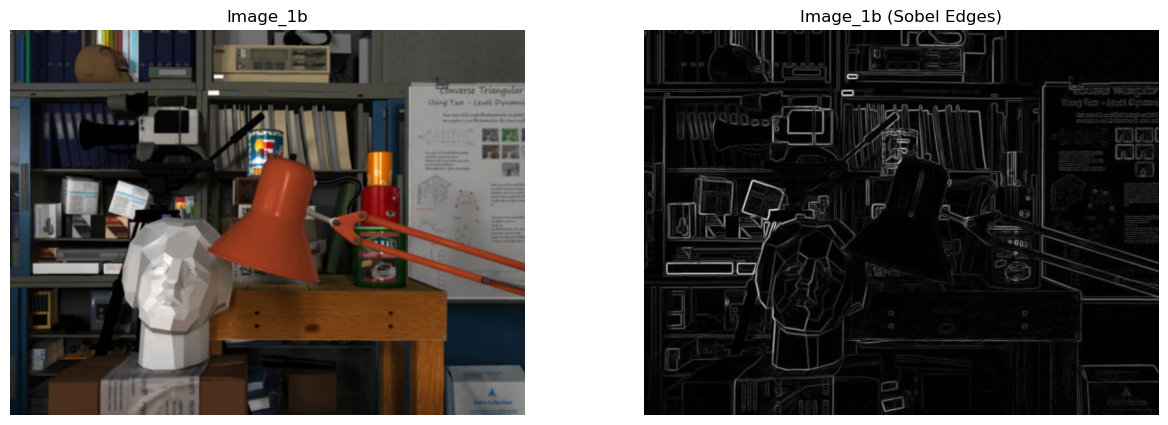

In [190]:
# extracting the edge features from the first image in the given dataset and displaying.
image = imread(image_path)
edge_features = compute_sobel_edges(image) # DEFINITION OF THIS FUNCTION IS TO BE COMPLETED IN PREVIOUS CELL. 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title(image_name)
ax[0].axis('off')

ax[1].imshow(edge_features, cmap = plt.cm.gray)
ax[1].set_title(image_name + ' (Sobel Edges)')
ax[1].axis('off')

plt.show()

(c) Extraction of SIFT features.

In [191]:
def compute_sift_features(image_path):
    ###
    #   description:  
    #       this function computes the SIFT features from the given image.
    #  
    #   input parameters: 
    #       image (numpy array): a numpy array containing the image of which the SIFT features are to be computed.
    #   
    #   output: 
    #       sift_features (numpy array): SIFT features from the given image.
    ### 
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    sift = cv.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(image,None)
    feature_sift = cv.drawKeypoints(gray, keypoints_1, image, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    ###
    #  INSERT YOUR CODE to compute the SIFT features.
    ### feature_sift
    return feature_sift

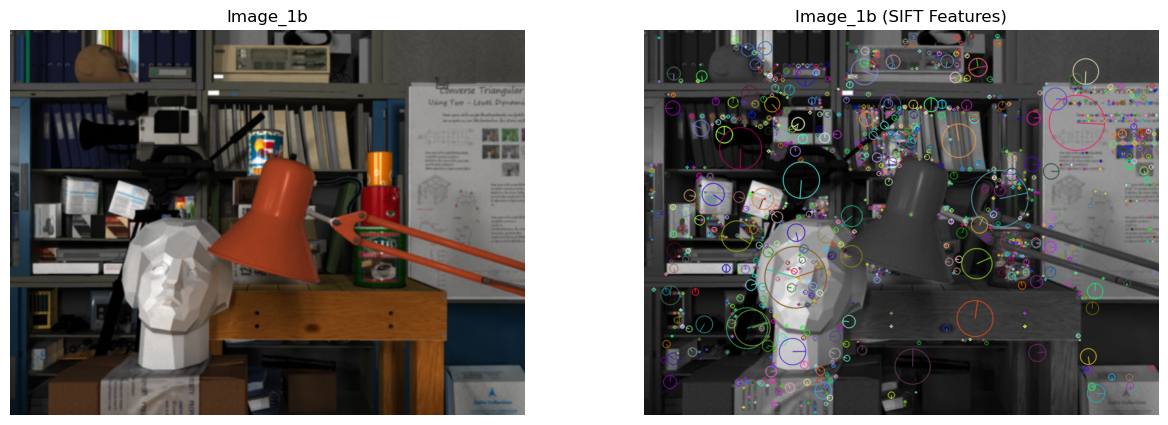

In [47]:
# extracting the SIFT features from the first image in the given dataset and displaying.
image = imread(image_path)
sift_features = compute_sift_features(image) # DEFINITION OF THIS FUNCTION IS TO BE COMPLETED IN PREVIOUS CELL. 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title(image_name)
ax[0].axis('off')

ax[1].imshow(sift_features, cmap = plt.cm.gray)
ax[1].set_title(image_name + ' (SIFT Features)')
ax[1].axis('off')

plt.show()

#### The assignment is completed, give yourself a pat.